## Install AWS API Client

In [3]:
!pip install --upgrade boto3


     |████████████████████████████████| 130 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 2.6 MB/s eta 0:00:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.20.23
    Uninstalling botocore-1.20.23:
      Successfully uninstalled botocore-1.20.23
  Attempting uninstall: boto3
    Found existing installation: boto3 1.17.23
    Uninstalling boto3-1.17.23:
      Successfully uninstalled boto3-1.17.23


## Import libraries

In [18]:
import boto3
import json
from io import BytesIO

from IPython.display import display
from PIL import ImageDraw, Image
from trp import Document

#create a S3 Client
s3 = boto3.client('s3')
#create a Textract Client
textract = boto3.client('textract')


## Show the File to Analyze

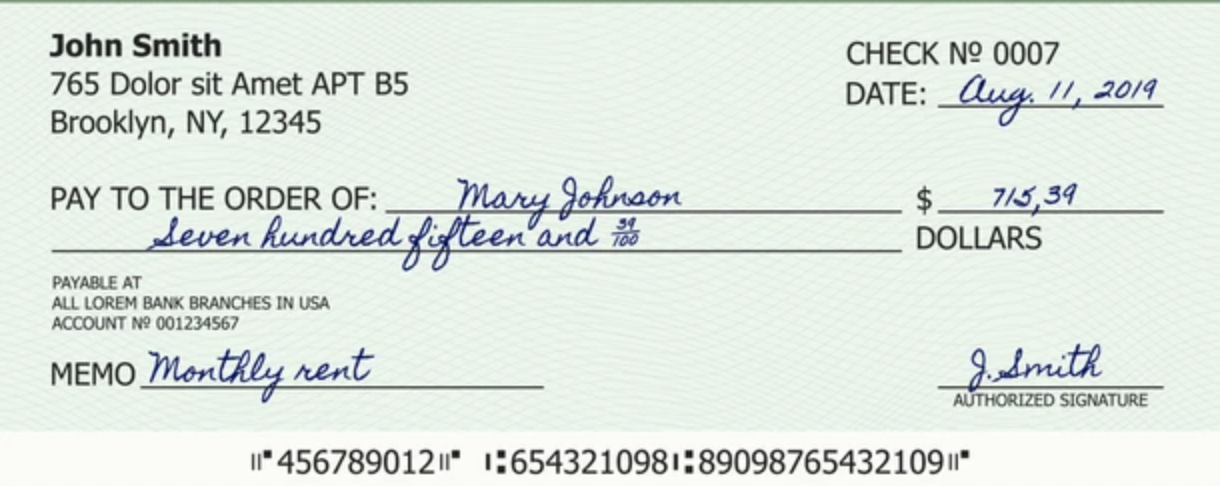

In [22]:
#Set PDF File location
input_file_location = "./"
input_file_name = "check.png"

with open(input_file_location + input_file_name, 'rb') as document:
    filedata = bytearray(document.read())

img = Image.open(BytesIO(filedata))      

display(img) 

## Analyze the image
## Show the time consumed by each API

In [39]:
response_ocr = None

# Analyze the PNG Page using AnalyzeExpense API
%time textract_response = textract.analyze_document(Document={'Bytes': filedata},FeatureTypes=["FORMS", "TABLES"])


CPU times: user 24.6 ms, sys: 5.01 ms, total: 29.7 ms
Wall time: 2.47 s


## <span style="color:green">Parsing the Textract Results</span>

In [37]:
#Print the Textract OCR + FORMS + TABLES results
response_ocr = Document(textract_response)

for page in response_ocr.pages:
    # Print lines and words
    for line in page.lines:
        print("Line: {}".format(line.text))
        for word in line.words:
            print("Word: {}".format(word.text))

    # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

    # Print fields
    for field in page.form.fields:
        print("Field: Key: {}, Value: {}".format(field.key.text, field.value.text))
        

Line: John Smith
Word: John
Word: Smith
Line: CHECK N° 0007
Word: CHECK
Word: N°
Word: 0007
Line: 765 Dolor sit Amet APT B5
Word: 765
Word: Dolor
Word: sit
Word: Amet
Word: APT
Word: B5
Line: Brooklyn, NY, 12345
Word: Brooklyn,
Word: NY,
Word: 12345
Line: DATE: aug. 11, 2019
Word: DATE:
Word: aug.
Word: 11,
Word: 2019
Line: PAY TO THE ORDER OF:
Word: PAY
Word: TO
Word: THE
Word: ORDER
Word: OF:
Line: mary Johnson
Word: mary
Word: Johnson
Line: $  715,39
Word: $  715,39
Line: seven hundred fifteen and 100 39
Word: seven
Word: hundred
Word: fifteen
Word: and
Word: 100
Word: 39
Line: DOLLARS
Word: DOLLARS
Line: PAYABLE AT
Word: PAYABLE
Word: AT
Line: ALL LOREM BANK BRANCHES IN USA
Word: ALL
Word: LOREM
Word: BANK
Word: BRANCHES
Word: IN
Word: USA
Line: ACCOUNT N° 001234567
Word: ACCOUNT
Word: N°
Word: 001234567
Line: MEMO Monthly rent
Word: MEMO
Word: Monthly
Word: rent
Line: j.smith
Word: j.smith
Line: AUTHORIZED SIGNATURE
Word: AUTHORIZED
Word: SIGNATURE
Line: 456789012
Word: 456789012
